<a href="https://colab.research.google.com/github/ZahibVentura/Simulaci-n-2-/blob/main/Distribucion_Laplace_2D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importación de bibliotecas necesarias para graficar y trabajar con distribuciones
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns; sns.set(color_codes=True)
import scipy.stats as st
from itertools import accumulate
import numpy as np
import math
from mpl_toolkits.mplot3d import Axes3D

###Vamos a simular la distribución bivariada de Laplace por el algoritmo Metropoli-Hasting

$$ f(x,y) = \dfrac{1}{4\lambda^{2}} e^{(-\dfrac{|x-\mu_{x}|}{\lambda} - \dfrac{|y - \mu_{y}|}{\lambda})} $$

In [2]:
# Función que calcula la densidad de la distribución Laplace
def bivariate_Laplace(X, Y, mux = 1.0, muy = 1.5, lamda = 1.5):
    ''' bivariate Laplace distribution'''
    return 1 / ((2 * lamda)**2 * np.exp(-np.abs(X - mux)/lamda - np.abs(Y - muy) / lamda))

# Función para crear un gráfico conjunto de KDE
def plot_dist(x,y):
    ''' plotting environment we frequently use to visualise the
    sampling algorithms.'''

    sns.set_style('white')  #Establece el estilo de la gráfica
    plt.rcdefaults()

    # plot contour
    g = sns.JointGrid(x=x, y=y, height=10).plot_joint(sns.kdeplot, n_levels=4, cmap="BuPu", shade=True, shade_lowest=False)

    # add scatter plot of data
    g = g.plot_joint(plt.scatter, c="r", s=30, linewidth=1)
    plt.plot(x, y, linestyle='-', marker='', alpha=0.4, )

    # set axis labels
    g.set_axis_labels("$X$", "$Y$")

# Muestra la evolución de las muestras en una dimensión
def traceplot(x):
    '''traceplot in the x-dimension with the cumulative mean (r)
    and the actual mean (--)'''
    sns.tsplot(x)
    #Calculo de la media acumulada
    l = list(accumulate(x))
    nl = [v/i for i, v in enumerate(l,1)]  # Media acumulada en cada iteración
    plt.plot(nl, 'r')  # Gráfico de la media acumulada
    plt.axhline(y=0.0, color='k', linestyle='--')
    plt.ylabel('x')  #Etiquetas en los ejes
    plt.xlabel('Iteration')

# Función que genera un gráfico de autocorrelación con el desfase l
def autocorrelation_plot(x, l):
    '''plots the autocorrelation of x to lag = l'''
    plt.acorr(x - np.mean(x), maxlags=l,  normed=True, usevlines=False); # Gráfico de autocorrelación
    plt.xlim((0, 100))  # Limitar el rango de visualización del eje x
    plt.ylabel('Autocorrelation')
    plt.xlabel('Lag')  #Etiquetas en los ejes

Text(0.5, 0, '$\\pi(x,y)$')

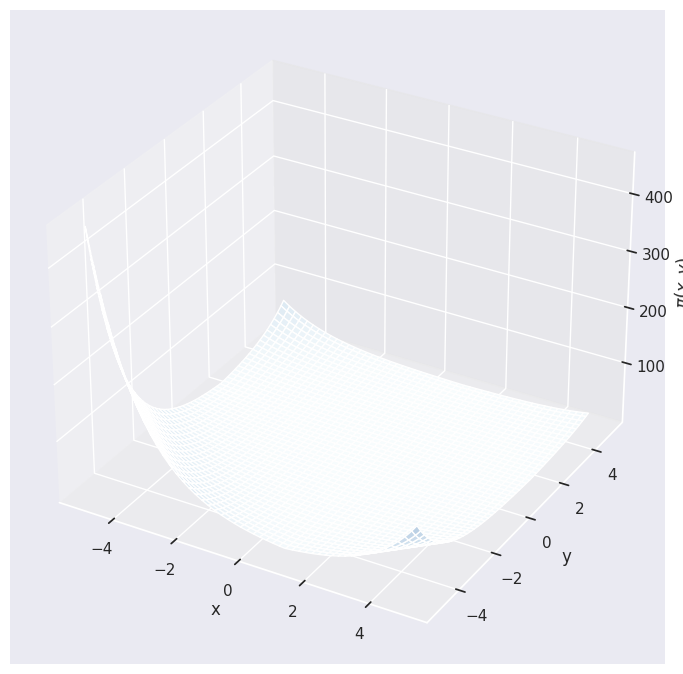

In [3]:
# create grid for 3D plot
x, y = np.linspace(-5, 5, 200), np.linspace(-5, 5, 200)
X,Y = np.meshgrid(x, y)

# generate bivariate normal
Z = bivariate_Laplace(X,Y)

# plot surface in 3D
fig = plt.figure(figsize=(12,8.5))   # Crear figura con un tamaño específico
ax = fig.add_subplot(111, projection='3d')   # Agregar un subplot en 3D
ax.plot_surface(X, Y, Z, cmap= 'BuPu')   # Graficar la superficie de la función de densidad

# Etiquetas para los ejes en el gráfico 3D
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('$\pi(x,y)$')

In [4]:
# Algoritmo de Metropolis-Hastings para muestrear de la distribución t bivariada
def metropolis_hastings(p, n, x0, y0, step):
    x = x0
    y = y0


    points = np.zeros((n, 2)) # Lista inicial de muestras, al momento, con puros ceros

    for i in range(n):

        # Proponemos nuevos valores para el estado actual mediante el muestreo Q(x',y' | x,y)
        x_star, y_star = np.array([x, y]) + np.random.normal(scale=step,size=2)

        # Condición de Metropolis-Hastings
        if np.random.rand() < p(x_star, y_star) / p(x, y):
            x, y = x_star, y_star

        # Se actualiza la lista de muestras
        points[i] = np.array([x, y])

    return points

In [5]:
# Ejecutar el algoritmo de Metropolis-Hastings con 600 iteraciones y paso inicial (-5, -5)
sos = metropolis_hastings(bivariate_Laplace, 600, -5, -5, 0.4)
print(sos[-1]) # Imprimir la última muestra

[-25.40313288 -44.04337223]


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1832: UserWarning: 

`shade_lowest` has been replaced by `thresh`; setting `thresh=0.05.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=self.x, y=self.y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1832: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=self.x, y=self.y, **kwargs)


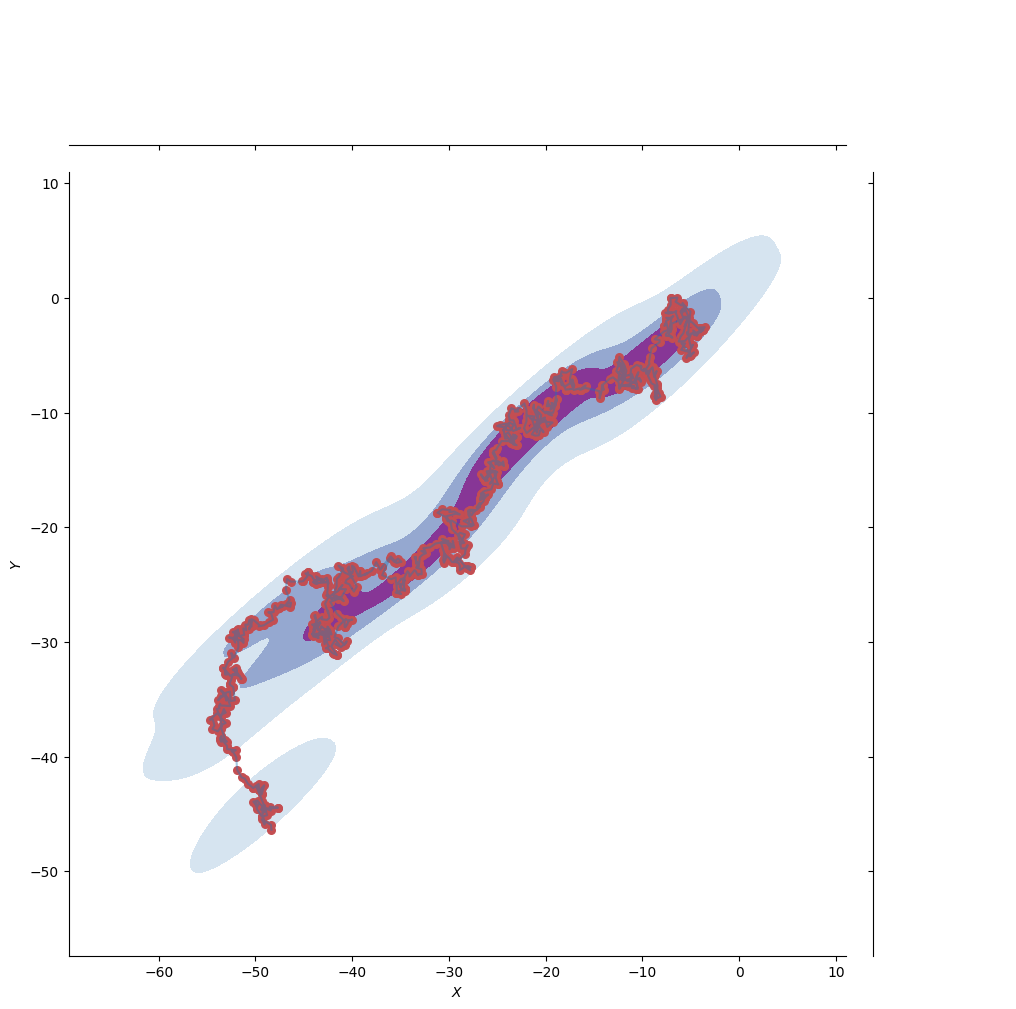

In [6]:
# generate the samples
samples = metropolis_hastings(bivariate_Laplace, 1000, -5, -5, 0.4)

# visualise
plot_dist(samples[:, 0], samples[:, 1])
plt.savefig('caminates.png')